<h1>CS 41344 - Natural Language Processing</h1>
<h2 style = 'color:yellow'>1.6 Deep Learning</h2>

<ul>
    <li>Introduction to Deep Learning</li>
    <li>Tools for Deep Learning</li>
    <li>Introduction to Neural Networks</li>
    <li>Neural Network Math</li>
</ul>

<h3 style = 'color:lightgreen'>1.6.0 Import Libraries</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from IPython.display import Image

<h3 style = 'color:lightgreen'>1.6.1 Basic Tensor Operations</h3>

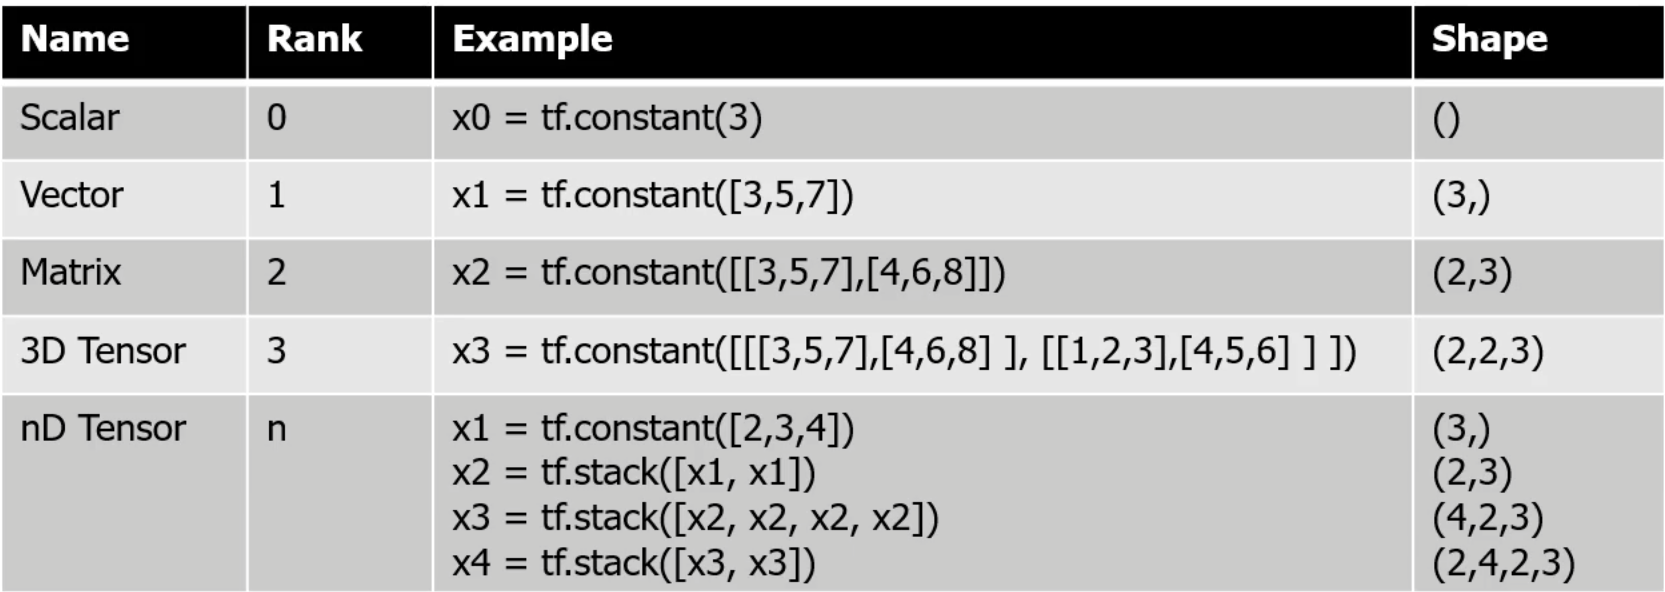

In [4]:
Image("../3. Images/Tensor Operations - 1.png", width=500, height=500)

In [5]:
tf.__version__

'2.10.0'

In [8]:
print(f"Scalar:\n {tf.constant(1)}")
print(f"Vector:\n {tf.constant([1, 2, 3])}")
print(f"Matrix:\n {tf.constant([[1, 2, 3], [4, 5, 6]])}")
print(f"Tensor:\n {tf.constant([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])}")

Scalar:
 1
Vector:
 [1 2 3]
Matrix:
 [[1 2 3]
 [4 5 6]]
Tensor:
 [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [10]:
# Slicing Operation
X = tf.constant([[1, 2, 3], [4, 5, 6]])
X[:, 1].numpy()

array([2, 5])

In [11]:
X[1, 0:2].numpy()

array([4, 5])

In [14]:
# Reshape Operation
X = tf.constant([[1, 2, 3], [4, 5, 6]])
tf.reshape(X, [1, 6]).numpy()

array([[1, 2, 3, 4, 5, 6]])

In [15]:
tf.reshape(X, [3, 2]).numpy()

array([[1, 2],
       [3, 4],
       [5, 6]])

In [16]:
def compute_area(sides):
    a = sides[:, 0]
    b = sides[:, 1]
    c = sides[:, 2]
    s = (a + b + c) * 0.5
    return tf.sqrt(s * (s - a) * (s - b) * (s - c))

In [18]:
compute_area(tf.constant([
    [5.0, 3.0, 7.1],
    [2.3, 4.1, 4.8]
])).numpy()

array([6.278497, 4.709139], dtype=float32)

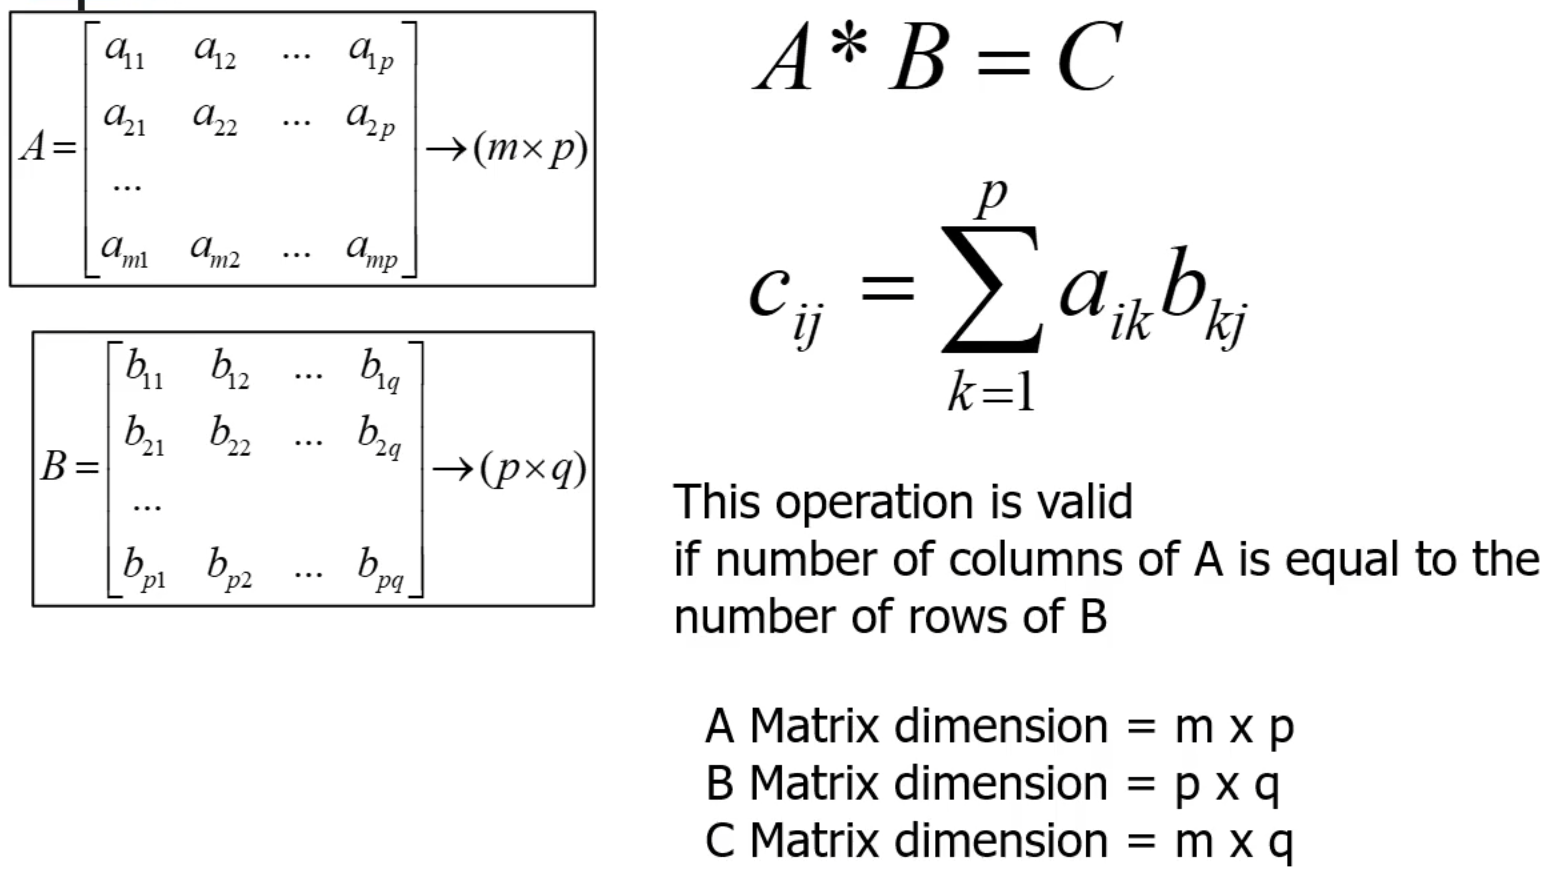

In [19]:
Image("../3. Images/Matrix Multiplication - 1.png", width=500, height=500)

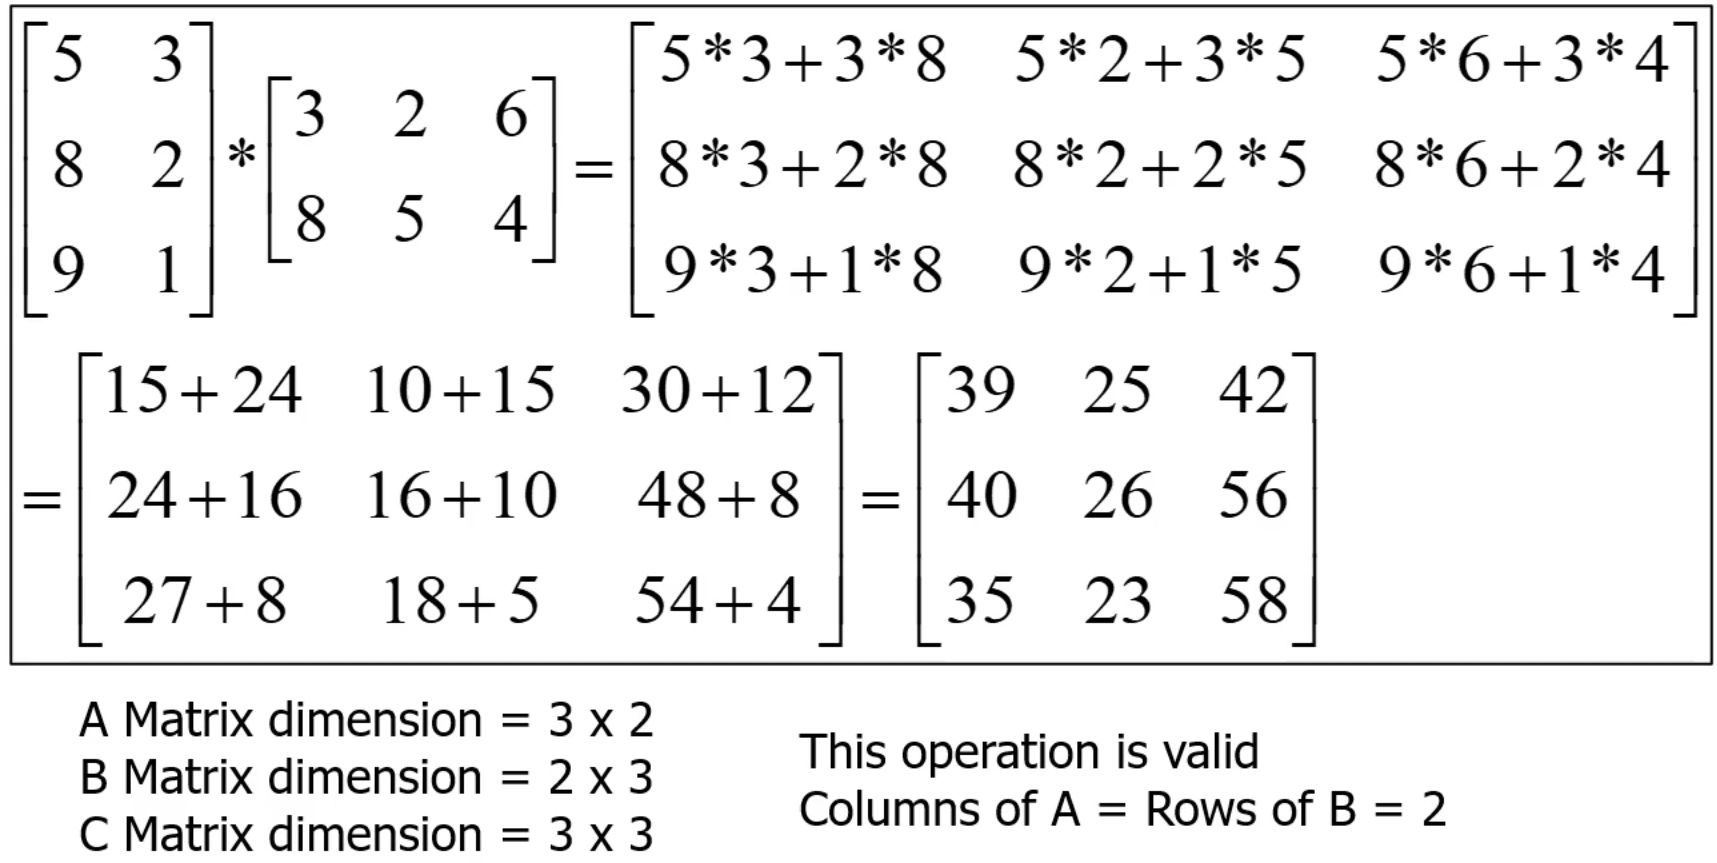

In [20]:
Image("../3. Images/Matrix Multiplication - 2.png", width=500, height=500)

In [26]:
m1 = tf.constant([
    [5, 3], 
    [8, 2],
    [9, 1]
], dtype=tf.float32)

m2 = tf.constant([
    [3, 8], 
    [2, 5],
    [6, 4]
], dtype=tf.float32)

try:
    tf.matmul(m1, m2).numpy()
except Exception as e:
    print(f"Exception: {e}")

Exception: {{function_node __wrapped____MklMatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul]


In [27]:
tf.matmul(m1, tf.transpose(m2)).numpy()

array([[39., 25., 42.],
       [40., 26., 56.],
       [35., 23., 58.]], dtype=float32)

<h3 style = 'color:lightgreen'>1.6.4 Neural Network Math</h3>

<h4 style = 'color:green'>1.6.4.1 Basics of Activation Functions</h4>

In [46]:
def calculate_activation(perceptron_value: tf.Tensor, activation_type: str) -> tf.Tensor:

    if activation_type == "ReLu":
        return tf.maximum(0, perceptron_value)
    elif activation_type == "Sigmoid":
        return 1 / (1 + tf.exp(-perceptron_value))
    elif activation_type == "Tanh":
        return (tf.exp(perceptron_value) - tf.exp(-perceptron_value)) / (tf.exp(perceptron_value) + tf.exp(-perceptron_value))
    elif activation_type == "Linear":
        return perceptron_value

In [47]:

# The following generates this error - InvalidArgumentError: {{function_node __wrapped____MklMatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} In[0] ndims must be >= 2 [Op:MatMul]
# The error you're encountering indicates that the matmul operation expects input tensors that are at least 2-dimensional. 
# However, the inputs and weights_1 tensors you've defined are 1-dimensional.

# In TensorFlow, matmul is used for matrix multiplication and thus requires matrices (or 2D tensors). 
# If you want to perform the dot product of two vectors, you can either reshape them to be 2-dimensional, 
# or you can use the tf.tensordot function.


# inputs = tf.constant([0.1, 0.2])
# weights_1 = tf.constant([0.15, 0.05])
# bias_1 = tf.constant(0.33)

# layer_1 = tf.matmul(inputs, tf.transpose(weights_1)) + bias_1
# layer_1.numpy()

# Revised Code
inputs = tf.constant([0.1, 0.2])
weights_1 = tf.constant([0.15, 0.05])
bias_1 = tf.constant(0.33)

# Using tensordot for dot product
layer_1_output = tf.tensordot(inputs, weights_1, axes=1) + bias_1
print(f"Layer 1 Output: {layer_1_output.numpy()}")

layer_1_activation = calculate_activation(layer_1_output, "Sigmoid")
print(f"Layer 1 Activation (Sigmoid): {layer_1_activation.numpy()}")

layer_2_weight = tf.constant(0.36)
layer_2_bias = tf.constant(0.56)

layer_2_output = layer_1_activation * layer_2_weight + layer_2_bias

layer_2_activation = calculate_activation(layer_2_output, "Sigmoid")
print(f"Layer 2 Activation (Sigmoid): {layer_2_activation.numpy()}")

Layer 1 Output: 0.35500001907348633
Layer 1 Activation (Sigmoid): 0.5878295302391052
Layer 2 Activation (Sigmoid): 0.6838709115982056


In [51]:
activation_functions = ["Sigmoid", "Linear", "Tanh", "ReLu"]
actF_layer1 = []
actF_Layer2 = []
for _ in activation_functions:
    actF_layer1.append(calculate_activation(layer_1_output, _).numpy())
    actF_Layer2.append(calculate_activation(layer_2_output, _).numpy())
    
df = pd.DataFrame({
    "Activation Function": activation_functions,
    "Layer 1 Activation": actF_layer1,
    "Layer 2 Activation": actF_Layer2
})
df

,Activation Function,Layer 1 Activation,Layer 2 Activation
0,Sigmoid,0.587830,0.683871
1,Linear,0.355000,0.771619
2,Tanh,0.340802,0.647870
3,ReLu,0.355000,0.771619


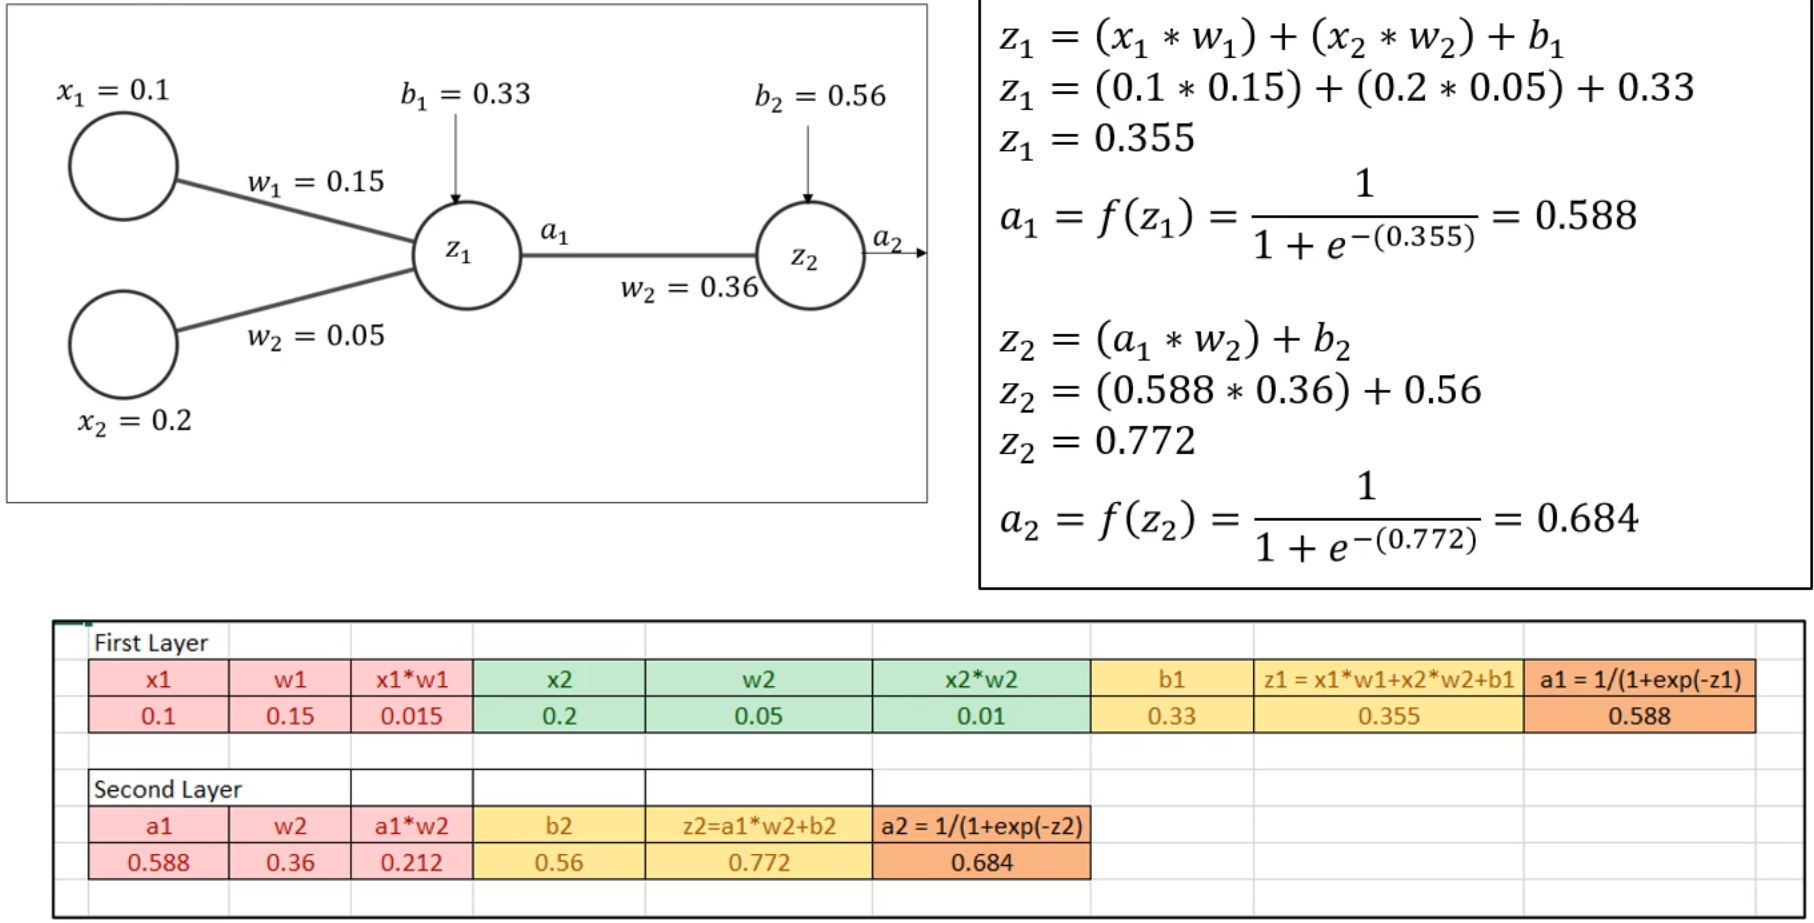

In [52]:
Image("../3. Images/Forward Propagation.png", width=500, height=500)

<h4 style = 'color:green'>1.6.4.2 Different Kinds of Activation Functions</h4>

There are 7 different activation functions in TensorFlow.

1. Binary Step Function
2. Linear
3. Sigmoid
4. Tanh (Hyperbolic Tangent Function) 
5. ReLu (Rectified Linear Unit)
6. Leaky Relu (Leaky Rectified Linear Unit)
7. Softmax

<b>Binary Step Function: </b> If the value of the input is greater than 0, then the output is 1. Otherwise, the output is 0. The problem with this activation function is that the slope of the output is 0. It leads to the <b>vanishing gradient</b> problem.

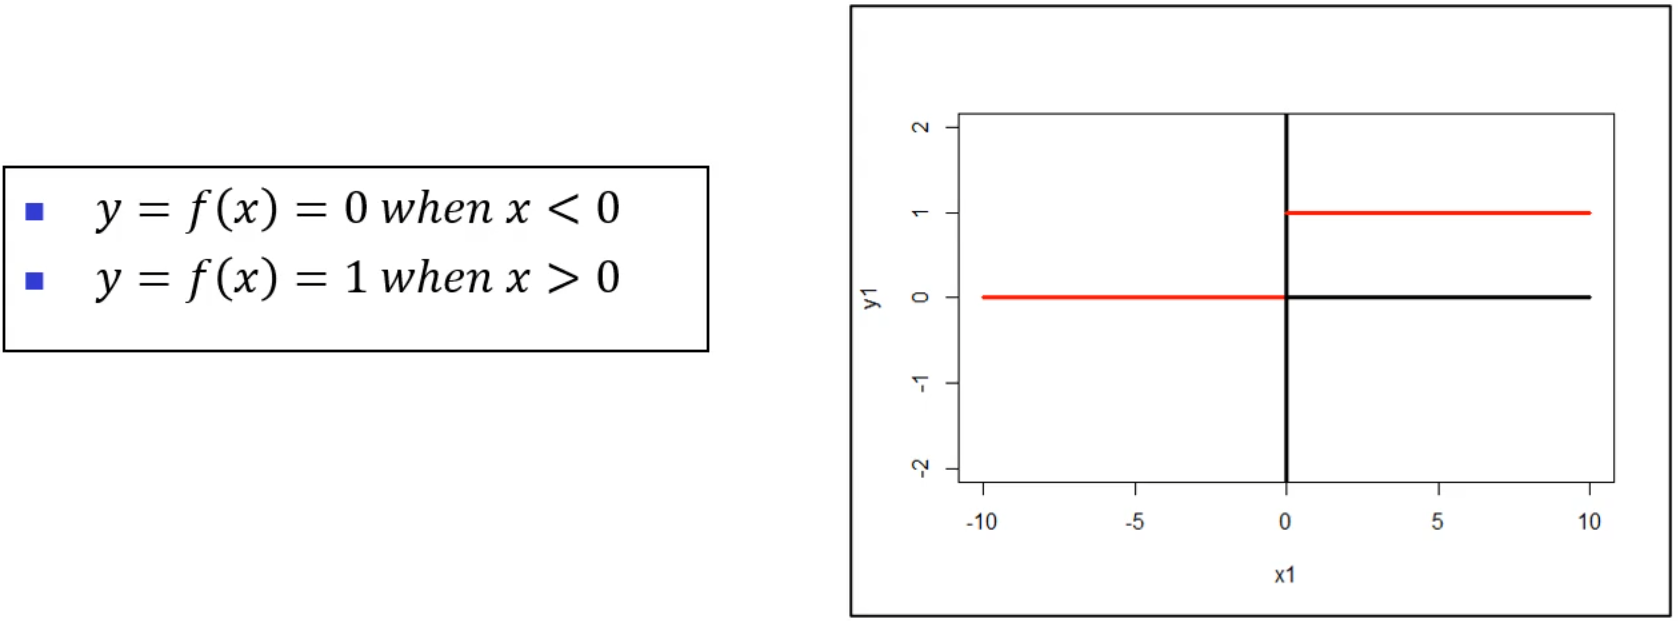

In [53]:
Image("../3. Images/Activation Function - 1.png", width=500, height=500)

<b>Linear Activation Function: </b> This activation function does not introduce any non-linearity. It is simply a linear combination of the input and the weight matrix. Whatever is the output from the current layer, it goes to the next layer.

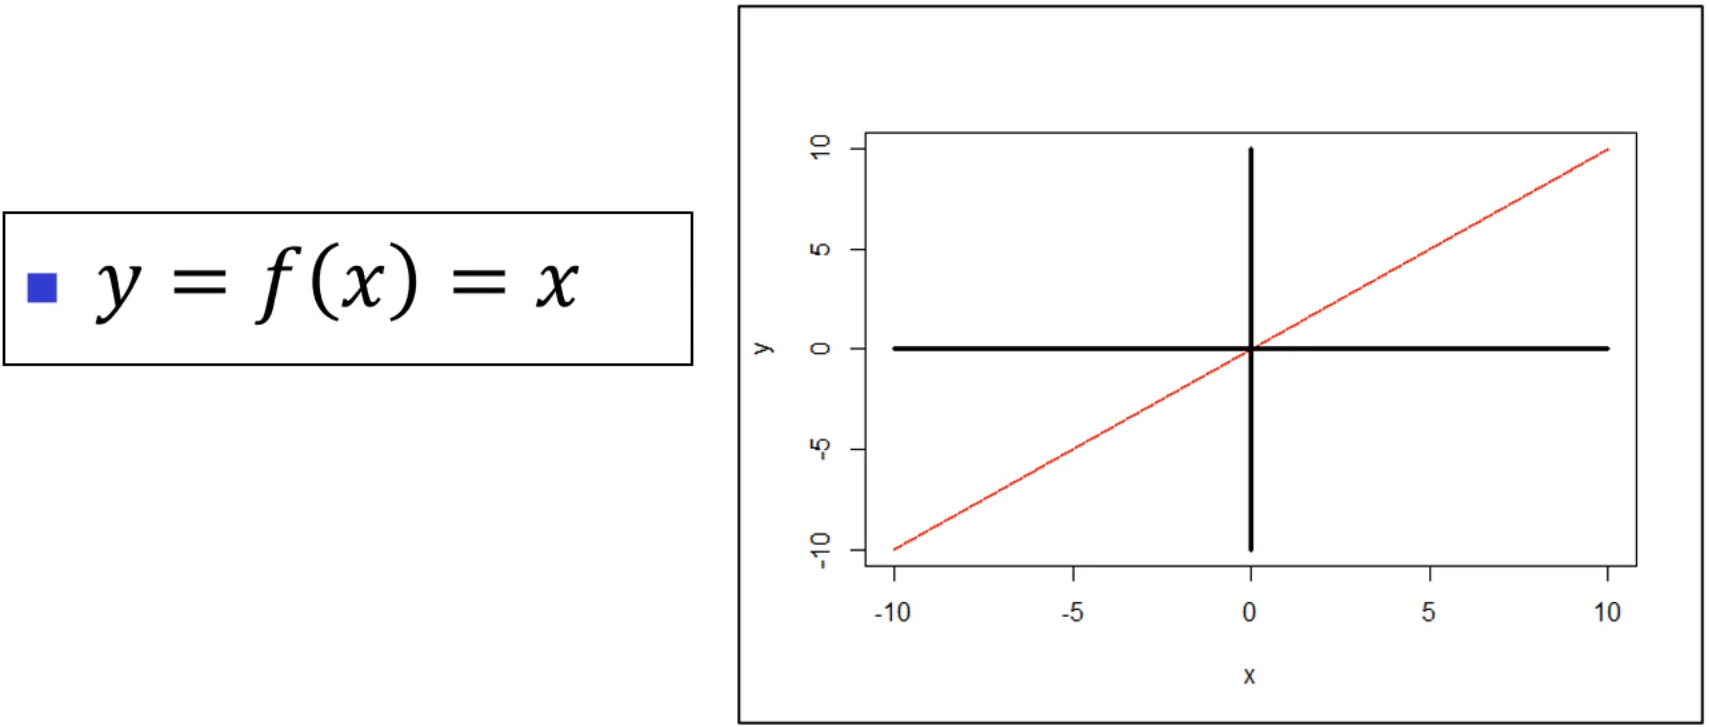

In [54]:
Image("../3. Images/Activation Function - 2.png", width=500, height=500)

<b>Sigmoid Activation Function: </b> This activation function introduces a sigmoid function to the output of the current layer. The value ranges between 0 and 1. If the value of x is negative, then the output is close to 0, if it is greater than 1, then the output is close to 1. Generally, speaking with this activation function, if the value of x is close to -3, then the output is 0 and when it is close to 3, then the output is 1. Any value outside this range (-3, 3) will result in the output being close to 0 or 1.

When the value of x is either close to -3 or 3, then this function results in the vanishing gradient problem. Also, this activation function only produces positive values. The computation time is also quite time consuming.

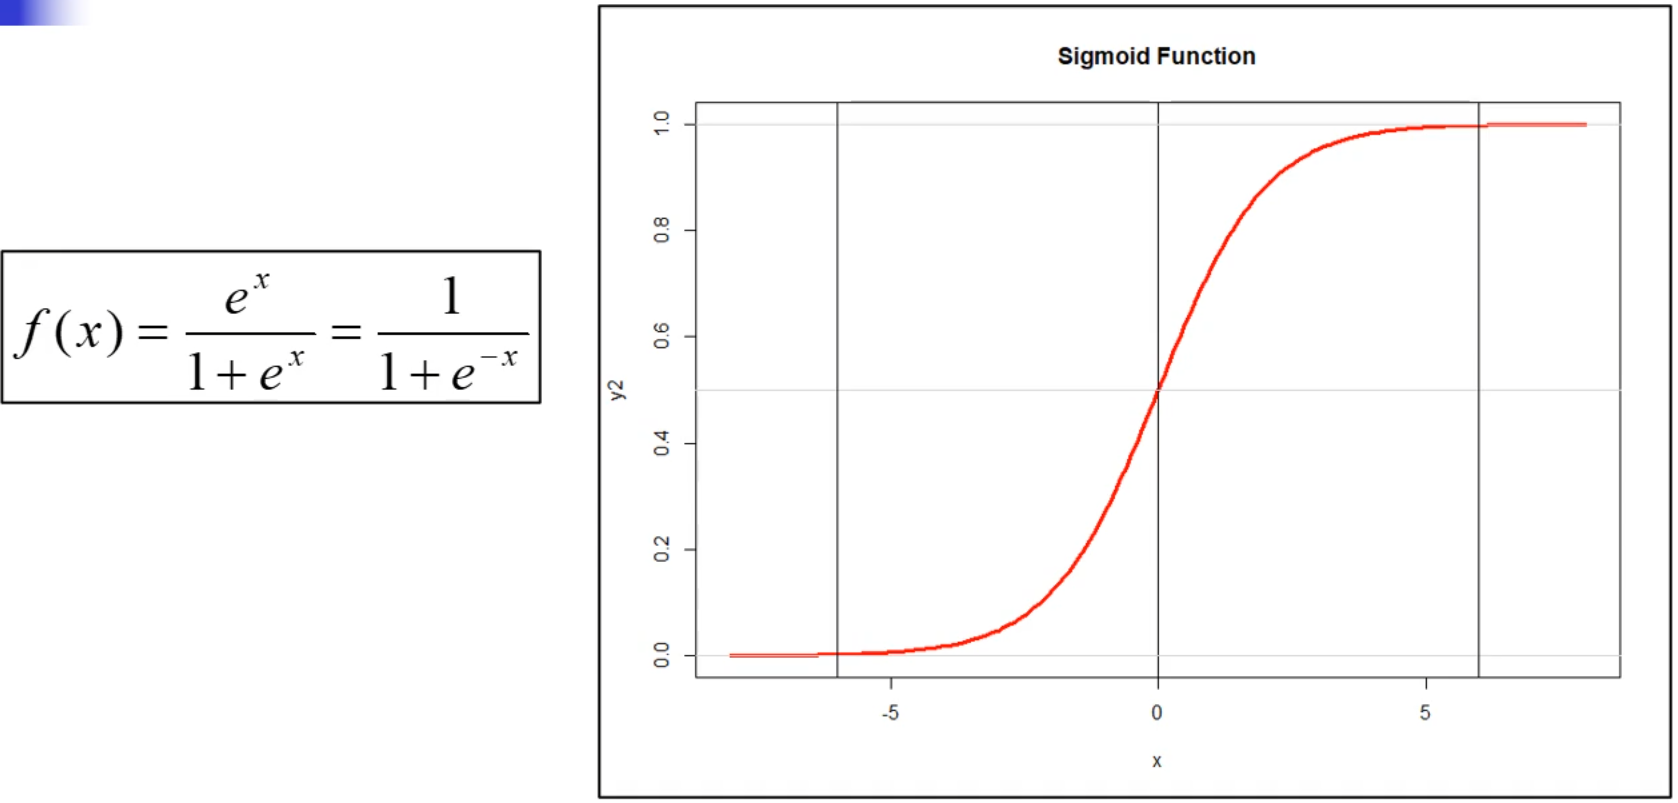

In [55]:
Image("../3. Images/Activation Function - 3.png", width=500, height=500)

<b>Tanh Activation Function: </b> This activation function introduces a hyperbolic tangent function to the output of the current layer. The value ranges between -1 and 1. It is similar to the sigmoid activation function, except that the value of x is between -1 and 1. This can also lead to the vanishing gradient problem.

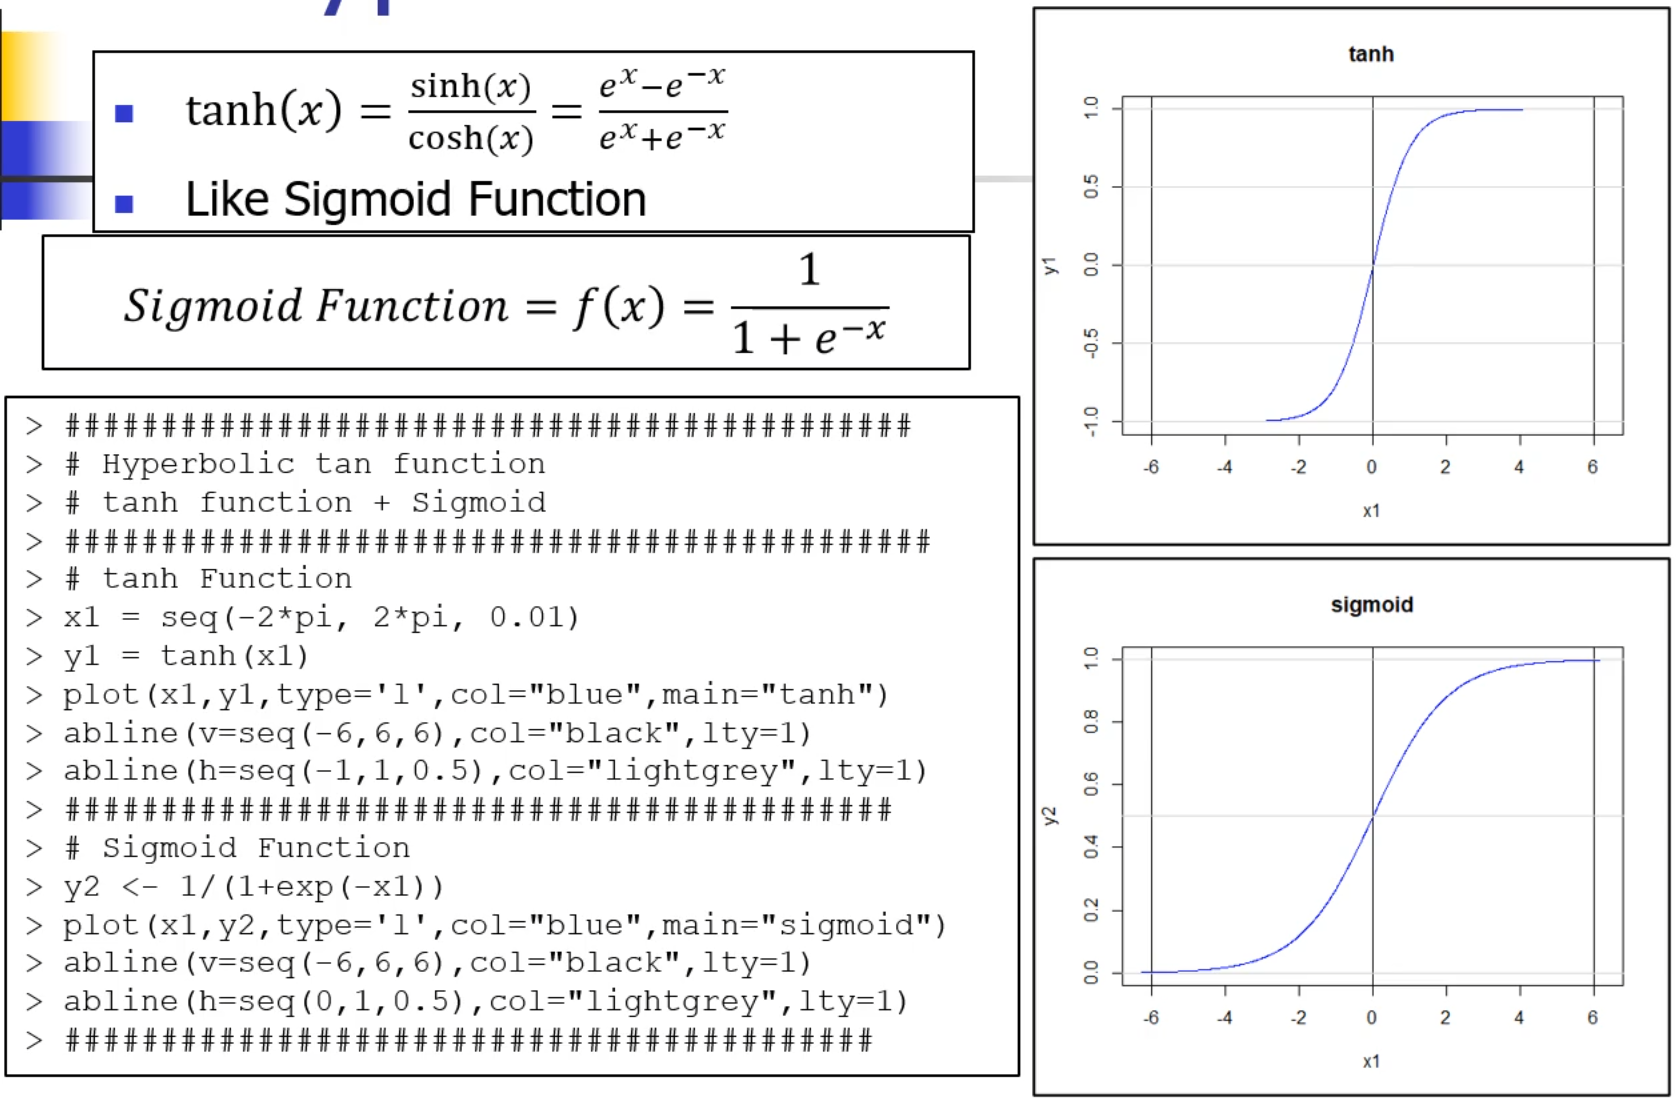

In [56]:
Image("../3. Images/Activation Function - 4.png", width=500, height=500)

The <b>ReLu Activation Function: </b> This activation function introduces a rectified linear unit function to the output of the current layer. When the value of the input is less than 0, the output is 0, otherwise the output is equal to the input. This function solves the vanishing gradient problem. If you want to turn off any neuron, then we can pass negative value to the neuron with ReLu activation function.

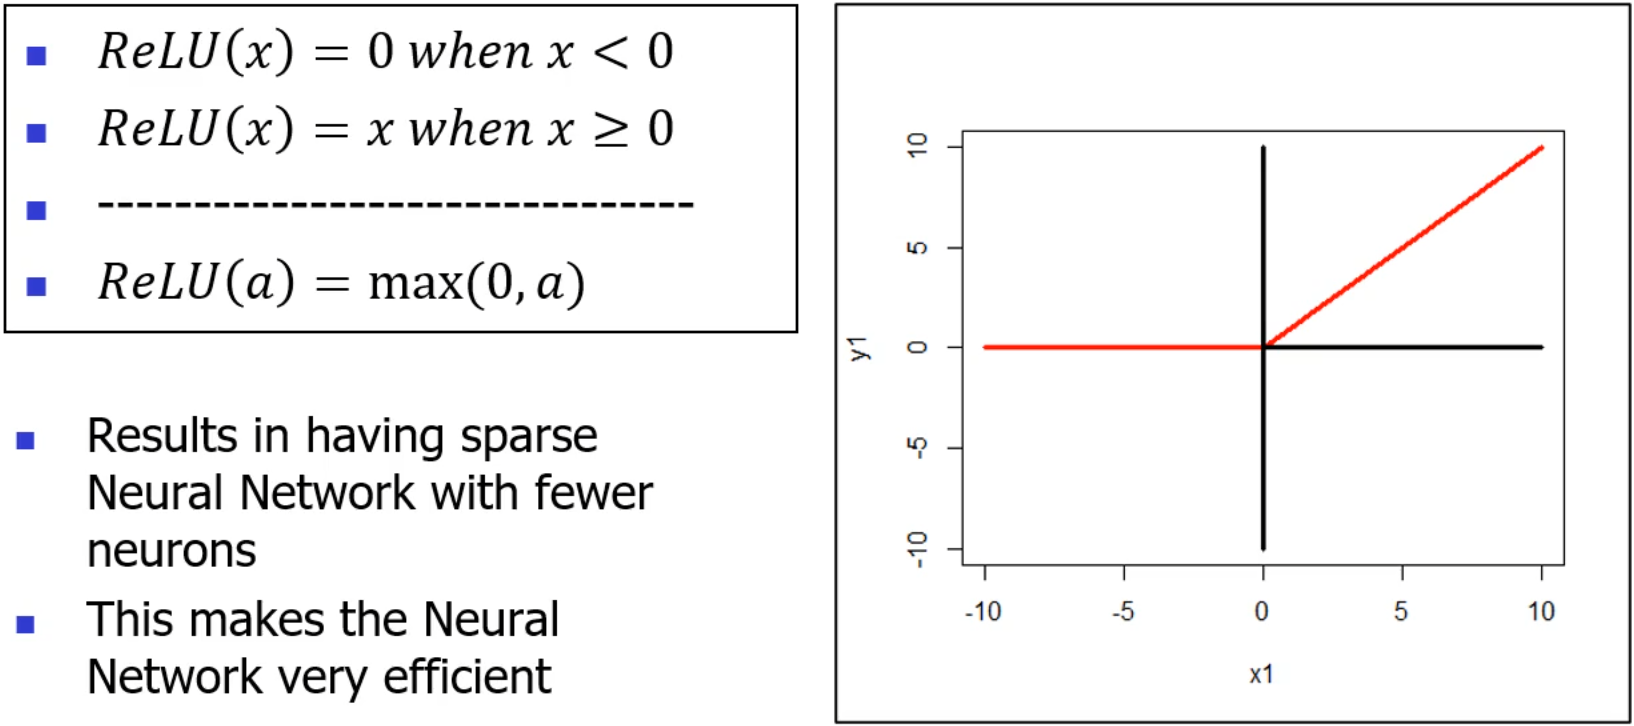

In [57]:
Image("../3. Images/Activation Function - 5.png", width=500, height=500)

In the case of <b>Leaky ReLu function</b>, if the input is negative, we take a small fraction of the signal, otherwise we take the entire signal. This helps the neural network to converge faster.

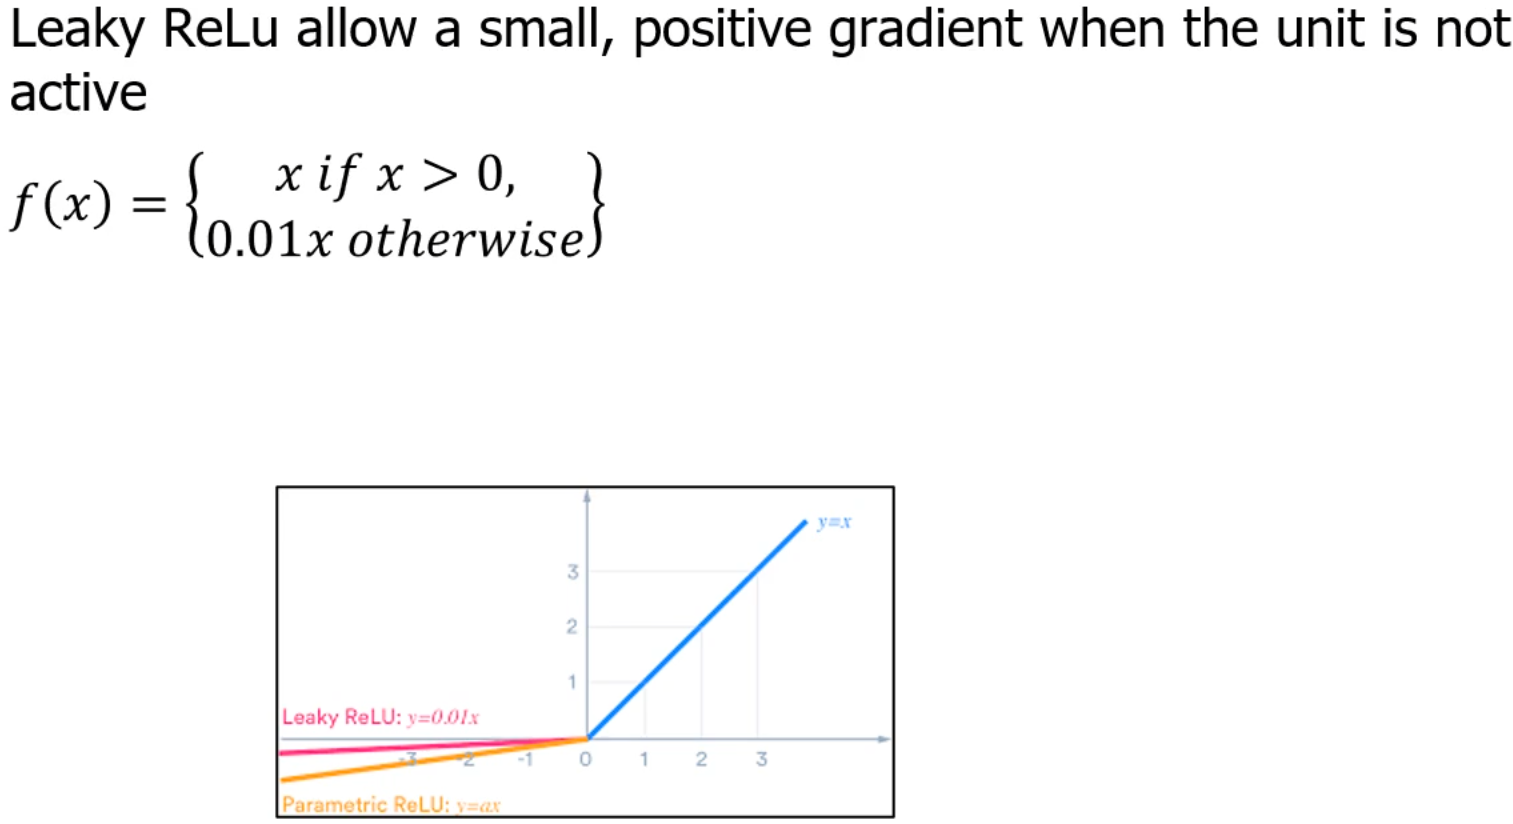

In [58]:
Image("../3. Images/Activation Function - 6.png", width=500, height=500)

The <b>Softmax Function</b> is used primarily for the output of the neural network, especially in the case of classification problems. The output of the neural network is a probability distribution over the classes. The probability distribution of each class is proportional to the number of times that class appears in the input.

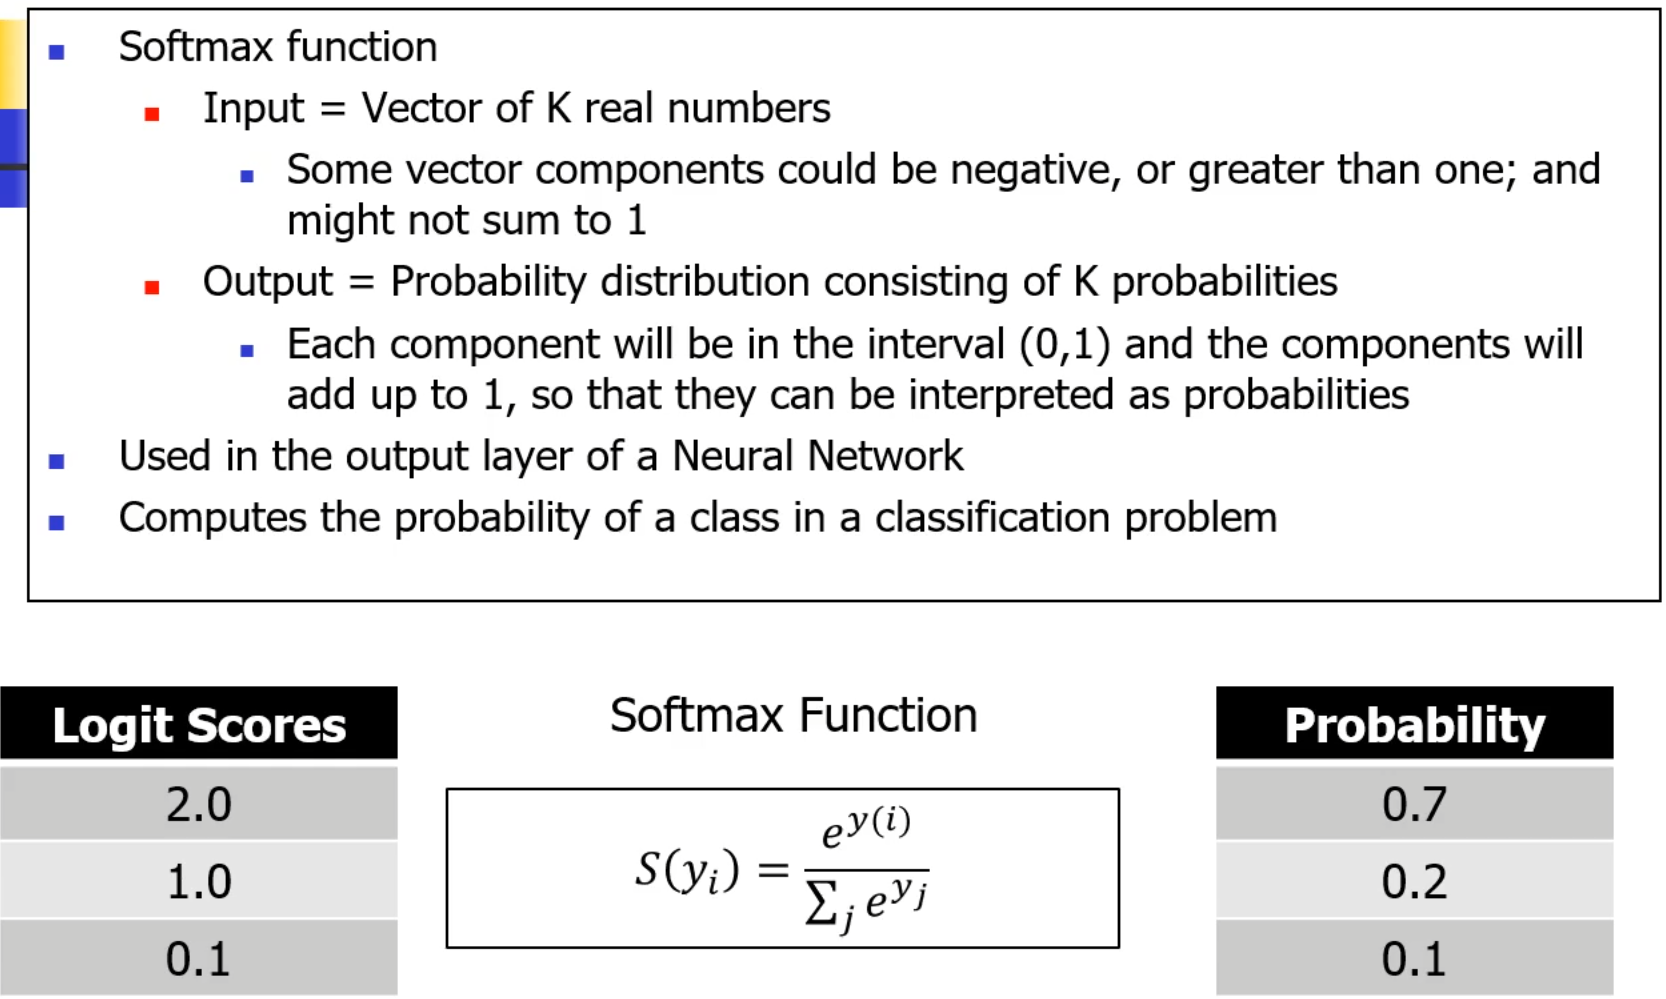

In [59]:
Image("../3. Images/Activation Function - 7.png", width=500, height=500)

In [64]:
def calculate_gradient(perceptron_value: tf.Tensor, activation_type: str) -> tf.Tensor:

    if activation_type == "ReLu":
        return tf.where(perceptron_value < 0, 0, 1)
    elif activation_type == "Sigmoid":
        return calculate_activation(perceptron_value, "Sigmoid") * (1 - calculate_activation(perceptron_value, "Sigmoid"))
    elif activation_type == "Tanh":
        return 1 - tf.square(calculate_activation(perceptron_value, "Tanh"))
    elif activation_type == "Linear":
        return 1

In [66]:
v1 = -4.0
v2 = 0.5
v3 = 4.0

activation_functions = ["Sigmoid", "Tanh", "ReLu"]
gradF_v1 = []
gradF_v2 = []
gradF_v3 = []

for _ in activation_functions:
    gradF_v1.append(calculate_gradient(v1, _).numpy())
    gradF_v2.append(calculate_gradient(v2, _).numpy())
    gradF_v3.append(calculate_gradient(v3, _).numpy())

df = pd.DataFrame({
    "Activation Function": activation_functions,
    "v1 Gradient": gradF_v1,
    "v2 Gradient": gradF_v2,
    "v3 Gradient": gradF_v3
})

df

,Activation Function,v1 Gradient,v2 Gradient,v3 Gradient
0,Sigmoid,0.017663,0.235004,0.017663
1,Tanh,0.001341,0.786448,0.001341
2,ReLu,0.000000,1.000000,1.000000


In [60]:
def softmax(x):
    return tf.exp(x) / tf.reduce_sum(tf.exp(x))

In [63]:
input_softmax_1 = tf.constant([2.3, 1.2, 0.3, 0.0])
input_softmax_2 = tf.constant([1.9, 1.7, 2.6, 0.2, 1.3])

softmax_output_1 = softmax(input_softmax_1)
softmax_output_2 = softmax(input_softmax_2)

data = {
    "Input": [input_softmax_1.numpy(), input_softmax_2.numpy()],
    "Softmax Output": [np.round(softmax_output_1.numpy(), 4), np.round(softmax_output_2.numpy(), 4)]
}

df = pd.DataFrame(data)
df

,Input,Softmax Output
0,"[2.3, 1.2, 0.3, 0.0]","[0.6376, 0.2122, 0.0863, 0.0639]"
1,"[1.9, 1.7, 2.6, 0.2, 1.3]","[0.2191, 0.1794, 0.4412, 0.04, 0.1202]"


In [70]:
def cross_entropy_loss(target: tf.Tensor, compValue: tf.Tensor) -> tf.Tensor:
    loss =  - ((target * np.log(compValue) + (1 - target) * np.log(1 - compValue)))
    return loss

In [74]:
data = {
    "Target [0]": [0, 0, 0, 0, 0],
    "Computed Value": [0.95, 0.8, 0.6, 0.4, 0.1],
    "Target [1]": [1, 1, 1, 1, 1],
}

df = pd.DataFrame(data)
df

,Target [0],Computed Value,Target [1]
0,0,0.95,1
1,0,0.80,1
2,0,0.60,1
3,0,0.40,1
4,0,0.10,1


In [75]:
df['Cross Entropy Loss [0]'] = cross_entropy_loss(df['Target [0]'], df['Computed Value'])
df['Cross Entropy Loss [1]'] = cross_entropy_loss(df['Target [1]'], df['Computed Value'])
df

,Target [0],Computed Value,Target [1],Cross Entropy Loss [0],Cross Entropy Loss [1]
0,0,0.95,1,2.995732,0.051293
1,0,0.80,1,1.609438,0.223144
2,0,0.60,1,0.916291,0.510826
3,0,0.40,1,0.510826,0.916291
4,0,0.10,1,0.105361,2.302585


In [76]:
a = [
    [5, 2, 3],
    [26, 56, 92],
    [3, 0, 26]
]
a

[[5, 2, 3], [26, 56, 92], [3, 0, 26]]

In [80]:
a1 = tf.argmax(a, axis=0).numpy()
a2 = tf.argmax(a, axis=1).numpy()

print(f"Argmax (axis=0): {a1}")
print(f"Argmax (axis=1): {a2}")

Argmax (axis=0): [1 1 1]
Argmax (axis=1): [0 2 2]
